In [2]:
import pandas as pd

# Load cleaned data
df = pd.read_csv('backend/data/final_cleaned_data.csv')
print(df.head())


         Date  Daily rainfall  Hourly rainfall  Flood  Max Temperature  \
0  1884-03-01             0.0              0.0    0.0             18.6   
1  1884-03-02             0.0              0.0    0.0             21.7   
2  1884-03-03             0.0              0.0    0.0             21.1   
3  1884-03-04             0.0              0.0    0.0             17.8   
4  1884-03-05             0.0              0.0    0.0             15.5   

   Min Temperature   Humidity  amount of cloud  Temp Range  
0             14.6  78.154847             75.0         4.0  
1             14.4  78.154847             75.0         7.3  
2             14.2  78.154847             75.0         6.9  
3             14.7  78.154847             75.0         3.1  
4             14.1  78.154847             75.0         1.4  


In [3]:
print(df.describe())
print(df['Flood'].value_counts())  # Check the distribution of the target variable


       Daily rainfall  Hourly rainfall         Flood  Max Temperature  \
count    48608.000000     48608.000000  48608.000000     48608.000000   
mean         6.143585         0.008472      0.000535        25.419653   
std         20.150163         1.091128      0.023122         5.421758   
min          0.000000         0.000000      0.000000         3.200000   
25%          0.000000         0.000000      0.000000        21.100000   
50%          0.010000         0.000000      0.000000        26.400000   
75%          1.900000         0.000000      0.000000        30.100000   
max        534.100000       158.100000      1.000000        36.600000   

       Min Temperature      Humidity  amount of cloud    Temp Range  
count     48608.000000  48608.000000     48608.000000  48608.000000  
mean         20.758797     78.154847        70.445276      4.660856  
std           5.288798      8.373331        19.841918      1.645104  
min           0.000000     21.000000         0.000000      0.6

In [4]:
import pandas as pd
import numpy as np

# Assuming 'daily rainfall' might have NaN values
# Fill missing values with forward fill followed by backward fill as a fallback
df['Daily rainfall'] = df['Daily rainfall'].fillna(method='ffill').fillna(method='bfill')

# Create a rolling sum of the past 3 days, adjusting min_periods
df['rolling_3day_rainfall'] = df['Daily rainfall'].rolling(window=3, min_periods=1).sum()

df['high_rainfall'] = (df['Daily rainfall'] > 249).astype(int)


# Quick check to see how the data looks now
print(df[['Date', 'Daily rainfall', 'rolling_3day_rainfall']].head(10))


         Date  Daily rainfall  rolling_3day_rainfall
0  1884-03-01             0.0                    0.0
1  1884-03-02             0.0                    0.0
2  1884-03-03             0.0                    0.0
3  1884-03-04             0.0                    0.0
4  1884-03-05             0.0                    0.0
5  1884-03-06             0.0                    0.0
6  1884-03-07            50.6                   50.6
7  1884-03-08             0.0                   50.6
8  1884-03-09             0.8                   51.4
9  1884-03-10             0.0                    0.8


In [7]:
# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day as separate features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# drop the original 'Date' column if not use it directly
df = df.drop('Date', axis=1)


In [8]:
# Check for any non-numeric columns
non_numeric_columns = df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

# If any categorical data is present, convert it using one-hot encoding
if not non_numeric_columns.empty:
    df = pd.get_dummies(df, columns=non_numeric_columns)


Non-numeric columns: Index([], dtype='object')


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features and target variable
X = df.drop('Flood', axis=1)
y = df['Flood']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9993828430364122
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9717
         1.0       0.00      0.00      0.00         5

    accuracy                           1.00      9722
   macro avg       0.50      0.50      0.50      9722
weighted avg       1.00      1.00      1.00      9722



In [10]:
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)
y_pred_balanced = rf_balanced.predict(X_test)
print("Balanced Model Accuracy:", accuracy_score(y_test, y_pred_balanced))
print(classification_report(y_test, y_pred_balanced))


Balanced Model Accuracy: 0.9994857025303435
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9717
         1.0       0.00      0.00      0.00         5

    accuracy                           1.00      9722
   macro avg       0.50      0.50      0.50      9722
weighted avg       1.00      1.00      1.00      9722



/Users/mac/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mac/anaconda3/envs/newenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_smote = RandomForestClassifier(n_estimators=100, random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = rf_smote.predict(X_test)
print("SMOTE Model Accuracy:", accuracy_score(y_test, y_pred_smote))
print(classification_report(y_test, y_pred_smote))


SMOTE Model Accuracy: 0.9991771240485496
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9717
         1.0       0.33      0.60      0.43         5

    accuracy                           1.00      9722
   macro avg       0.67      0.80      0.71      9722
weighted avg       1.00      1.00      1.00      9722



In [12]:
from sklearn.metrics import precision_recall_curve, f1_score, auc

# Get probabilities instead of binary predictions
y_probs = rf_smote.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Determine the best threshold: can prioritise recall here
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print("Optimal threshold by F1:", optimal_threshold)
print("Precision:", precision[optimal_idx], "Recall:", recall[optimal_idx])

# Apply custom threshold to make final predictions
y_pred_custom = (y_probs >= optimal_threshold).astype(int)
print("Adjusted Classification Report:")
print(classification_report(y_test, y_pred_custom))


Optimal threshold by F1: 0.9
Precision: 0.0 Recall: 0.0
Adjusted Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9717
         1.0       0.00      0.00      0.00         5

    accuracy                           1.00      9722
   macro avg       0.50      0.50      0.50      9722
weighted avg       1.00      1.00      1.00      9722



/var/folders/nk/wzcjy06d0kz0t75b5z7_k1w00000gn/T/ipykernel_10018/1633245629.py:10: RuntimeWarning: invalid value encountered in divide
  f1_scores = 2 * (precision * recall) / (precision + recall)


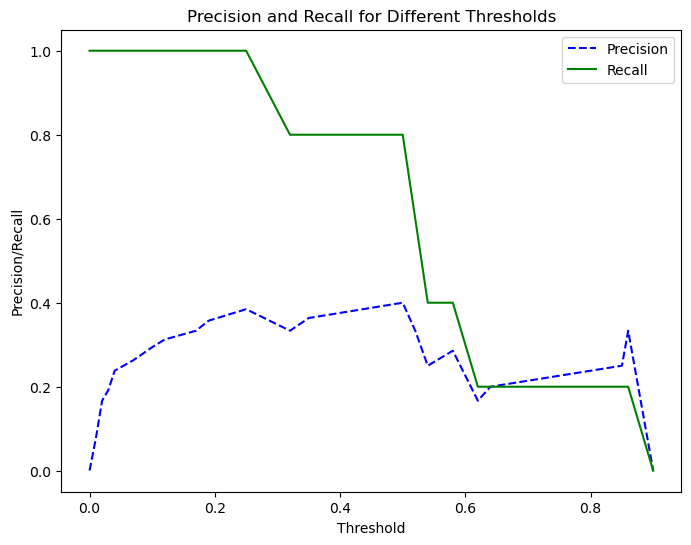

Manual Threshold Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9717
         1.0       0.38      1.00      0.56         5

    accuracy                           1.00      9722
   macro avg       0.69      1.00      0.78      9722
weighted avg       1.00      1.00      1.00      9722



In [13]:
import matplotlib.pyplot as plt

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Precision/Recall")
plt.title("Precision and Recall for Different Thresholds")
plt.legend()
plt.show()

# Manually select a threshold that provides a better recall
manual_threshold = 0.2 # example value

y_pred_manual = (y_probs >= manual_threshold).astype(int)
print("Manual Threshold Classification Report:")
print(classification_report(y_test, y_pred_manual))


In [14]:
import joblib
joblib.dump(rf_smote, 'flood_prediction_model.pkl')  # Save the model


['flood_prediction_model.pkl']